In [2]:
%load_ext snakeviz

In [32]:
from benchmark import Benchmark
from quantum import H_from_qubo, Qobj
from MaxCut import MaxCut

from qutip.parallel import parallel_map, serial_map

from qaoa_and_tdvp import QAOA, QAOAResult, qaoa_tdvp_rhs

import pickle

import numpy as np
from numpy.typing import NDArray
from typing import List, Tuple, Union, Optional, Callable, Any
import networkx as nx
import matplotlib.pyplot as plt
import plotly as py

import pandas as pd

In [4]:
num_vertices = 4
prob=((1+.1)*np.log(num_vertices))/num_vertices
g=nx.fast_gnp_random_graph(n=num_vertices,p=prob)
if nx.is_connected(g):
    nx.draw(g, with_labels=True)

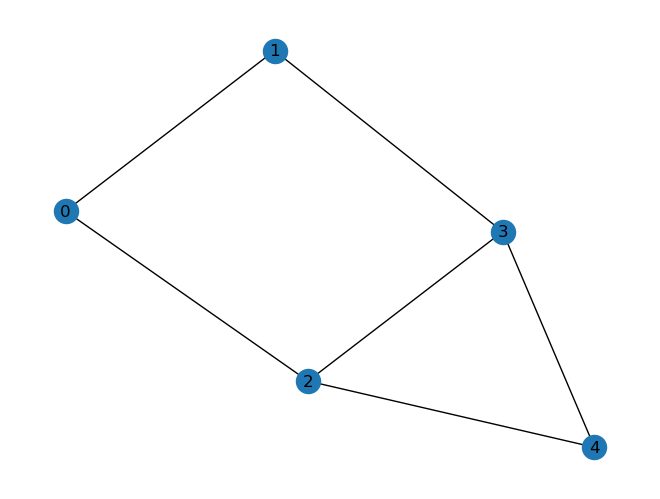

In [34]:
instance = MaxCut(nx.house_graph())
qaoa = QAOA(instance.qubo, p=1, mapping=serial_map)
delta = tuple(1 for _ in range(2 * qaoa.p))
bench = Benchmark()

In [64]:
for p in range(1, 3):
    for Delta in np.arange(.01,1,.2):
        bench.run(
        qaoa=qaoa,
        delta_0=tuple(1 for _ in range(2 * p)),
        p=p,
        tdvp_stepsize=Delta,
        tdvp_grad_tol=1e-3,
        tdvp_lineq_solver="RK45",
        )
bench.save("RK45_Delta01-2_p1-5_house")

KeyboardInterrupt: 